In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("coddata.csv")

In [3]:
data.head()

,Loadout,Kills,Latency (ms),Placement,Contracts,TTL (Time to Loadout/Time to Live) (seconds),Redeploy,Top 20
0,0,2,29,86,1,497,0,0
1,0,1,31,108,0,352,0,0
2,0,5,20,90,0,491,1,0
3,1,2,10,27,2,737,1,0
4,0,3,29,46,0,562,1,0


In [4]:
data.shape

(65, 8)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 8 columns):
 #   Column                                        Non-Null Count  Dtype
---  ------                                        --------------  -----
 0   Loadout                                       65 non-null     int64
 1   Kills                                         65 non-null     int64
 2   Latency (ms)                                  65 non-null     int64
 3   Placement                                     65 non-null     int64
 4   Contracts                                     65 non-null     int64
 5   TTL (Time to Loadout/Time to Live) (seconds)  65 non-null     int64
 6   Redeploy                                      65 non-null     int64
 7   Top 20                                        65 non-null     int64
dtypes: int64(8)
memory usage: 4.2 KB


In [6]:
data.isnull()

,Loadout,Kills,Latency (ms),Placement,Contracts,TTL (Time to Loadout/Time to Live) (seconds),Redeploy,Top 20
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
60,False,False,False,False,False,False,False,False
61,False,False,False,False,False,False,False,False
62,False,False,False,False,False,False,False,False
63,False,False,False,False,False,False,False,False


In [7]:
data.isnull().sum()

Loadout                                         0
Kills                                           0
Latency (ms)                                    0
Placement                                       0
Contracts                                       0
TTL (Time to Loadout/Time to Live) (seconds)    0
Redeploy                                        0
Top 20                                          0
dtype: int64

In [8]:
data.dtypes

Loadout                                         int64
Kills                                           int64
Latency (ms)                                    int64
Placement                                       int64
Contracts                                       int64
TTL (Time to Loadout/Time to Live) (seconds)    int64
Redeploy                                        int64
Top 20                                          int64
dtype: object

In [9]:
data.dtypes

Loadout                                         int64
Kills                                           int64
Latency (ms)                                    int64
Placement                                       int64
Contracts                                       int64
TTL (Time to Loadout/Time to Live) (seconds)    int64
Redeploy                                        int64
Top 20                                          int64
dtype: object

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Loadout,65.0,1.446154,1.392286,0.0,0.0,1.0,3.0,4.0
Kills,65.0,2.800000,2.431563,0.0,1.0,2.0,4.0,10.0
Latency (ms),65.0,24.276923,13.812933,5.0,21.0,22.0,27.0,122.0
Placement,65.0,56.723077,28.580209,3.0,39.0,55.0,78.0,110.0
Contracts,65.0,0.230769,0.492736,0.0,0.0,0.0,0.0,2.0
TTL (Time to Loadout/Time to Live) (seconds),65.0,417.676923,181.818600,105.0,322.0,412.0,491.0,1130.0
Redeploy,65.0,0.692308,0.705405,0.0,0.0,1.0,1.0,4.0
Top 20,65.0,0.123077,0.331082,0.0,0.0,0.0,0.0,1.0


In [11]:
top_20_data = data.groupby("Top 20").mean().round(2)

In [12]:
top_20_data

,Loadout,Kills,Latency (ms),Placement,Contracts,TTL (Time to Loadout/Time to Live) (seconds),Redeploy
Top 20,,,,,,,
0,1.33,2.23,24.28,63.65,0.21,395.33,0.58
1,2.25,6.88,24.25,7.38,0.38,576.88,1.50


In [13]:
import seaborn as sns

In [14]:
sns.set_style("whitegrid")

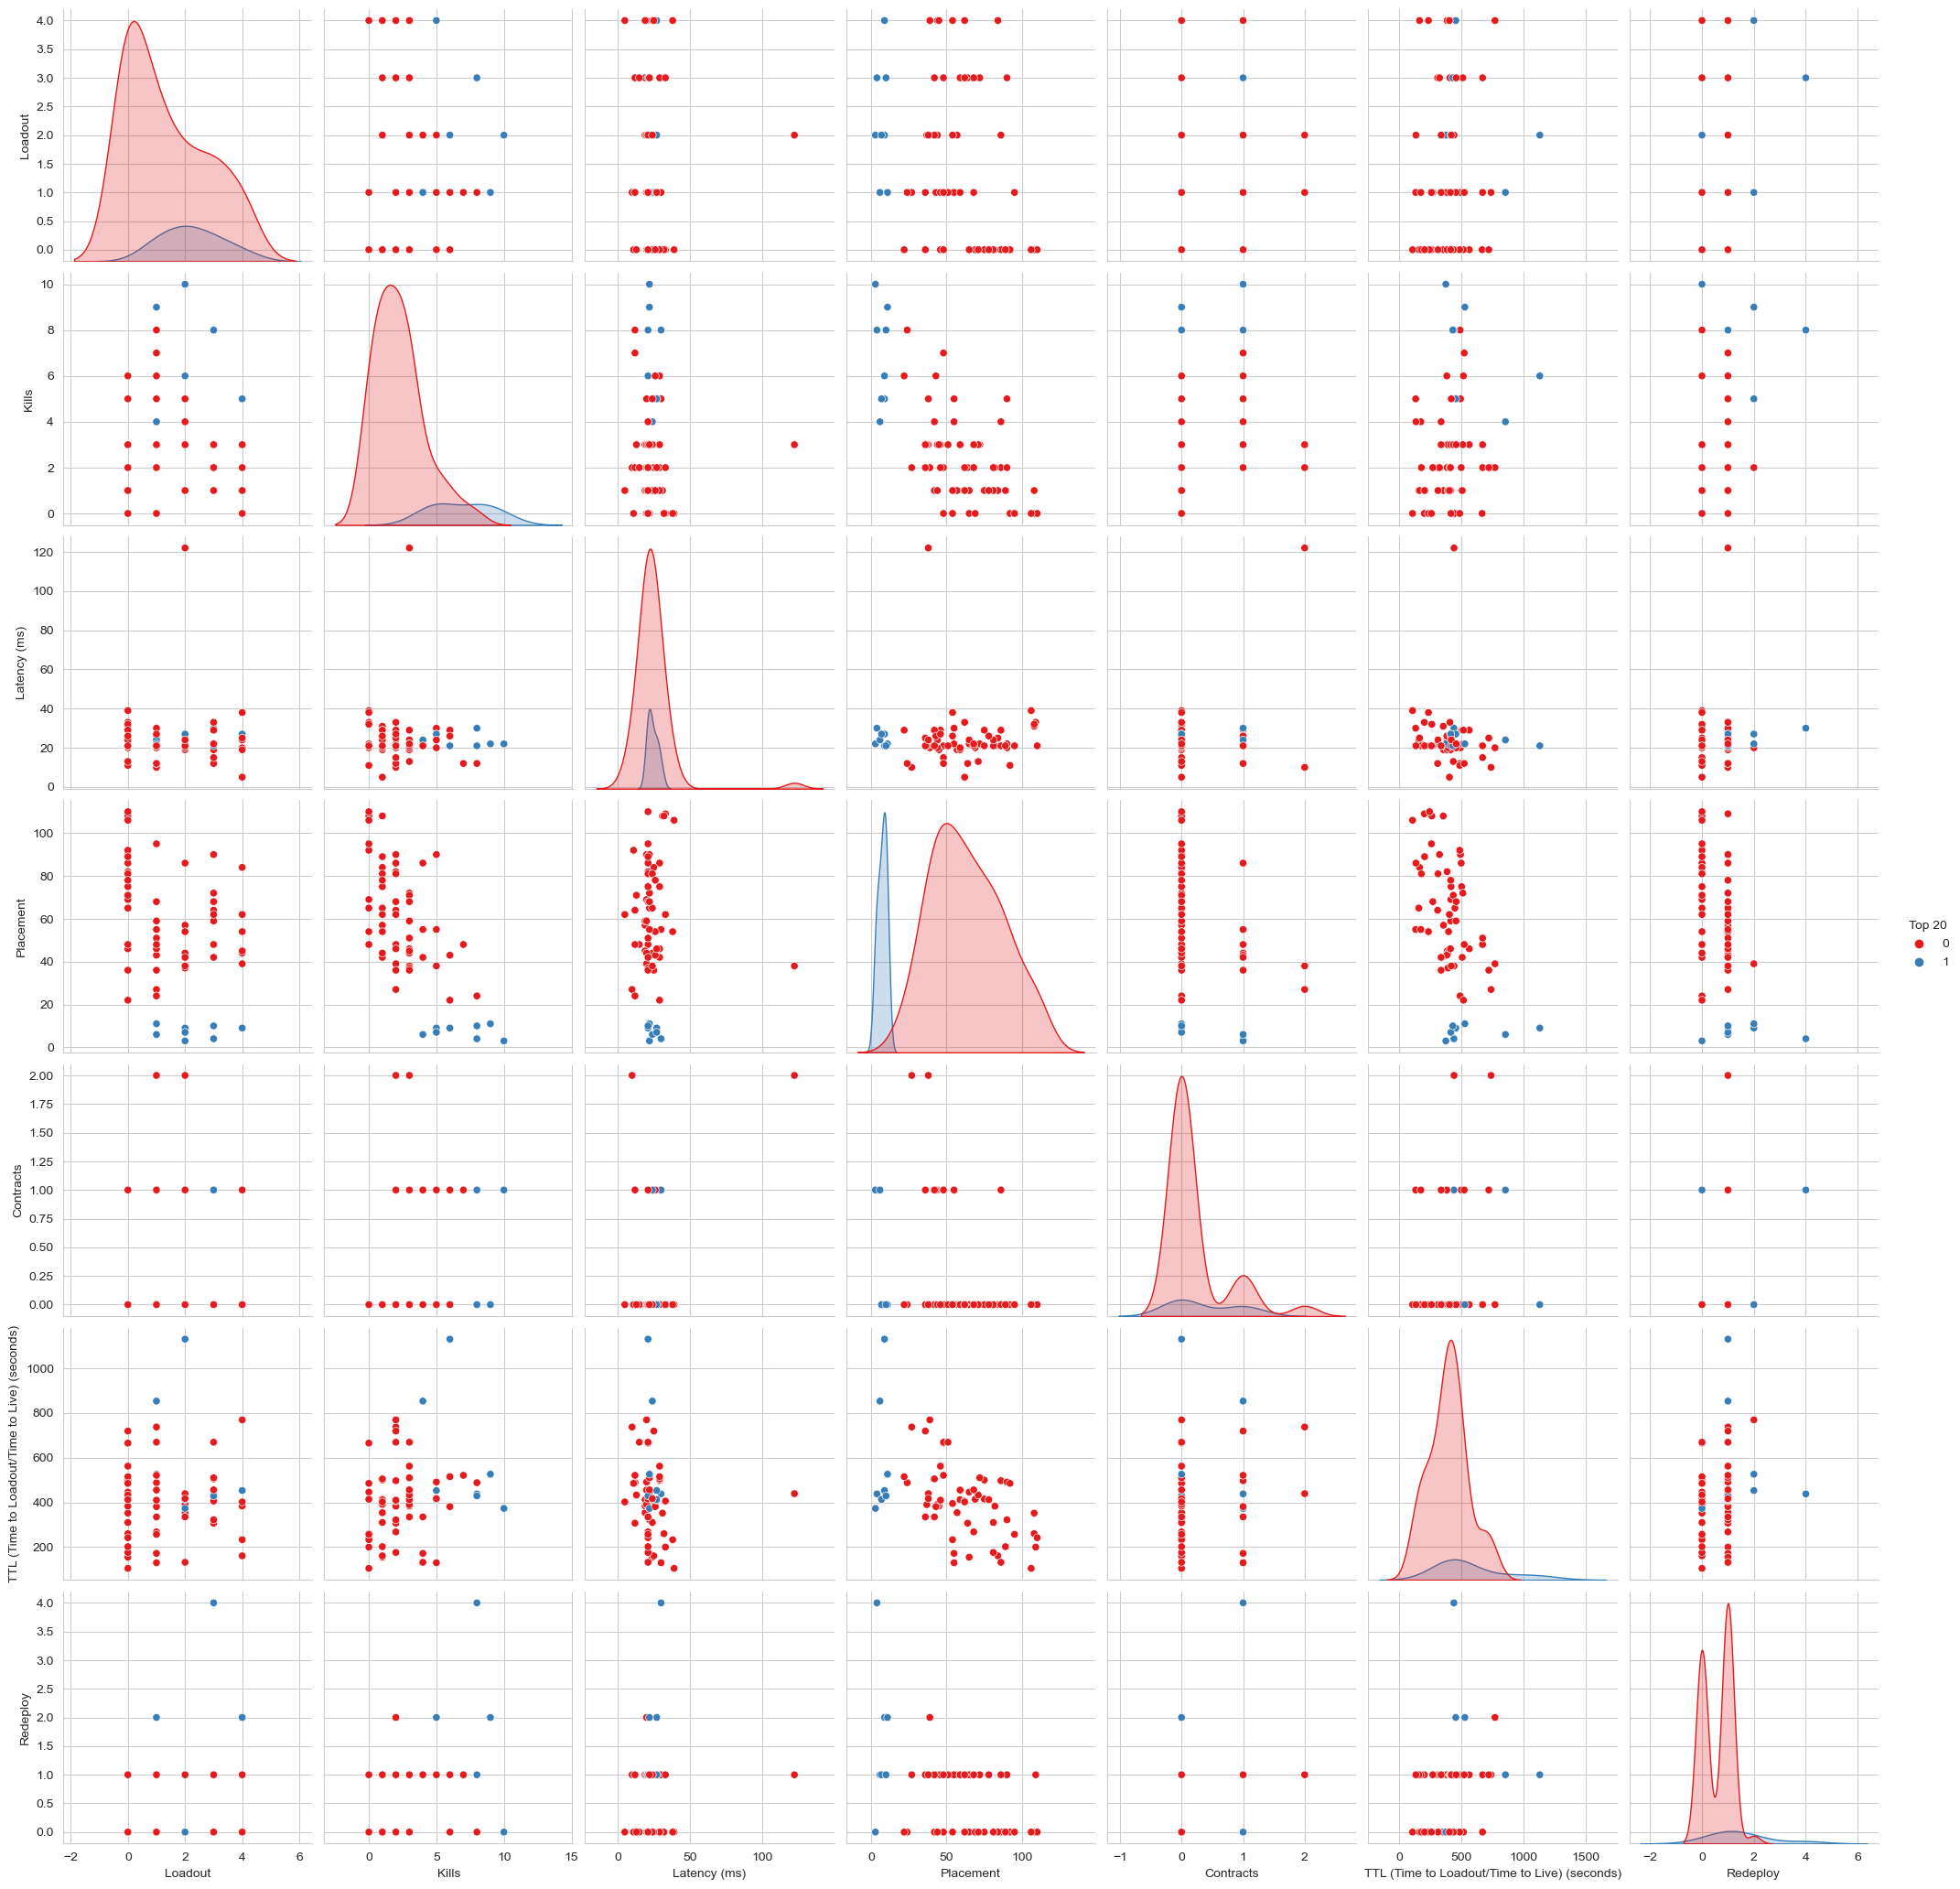

In [15]:
sns.pairplot(
    data[["Loadout", "Kills", "Latency (ms)", "Placement", "Contracts", "TTL (Time to Loadout/Time to Live) (seconds)", "Redeploy", "Top 20"]],
    hue = "Top 20",
    height = 3,
    palette = "Set1"
)

<Axes: >

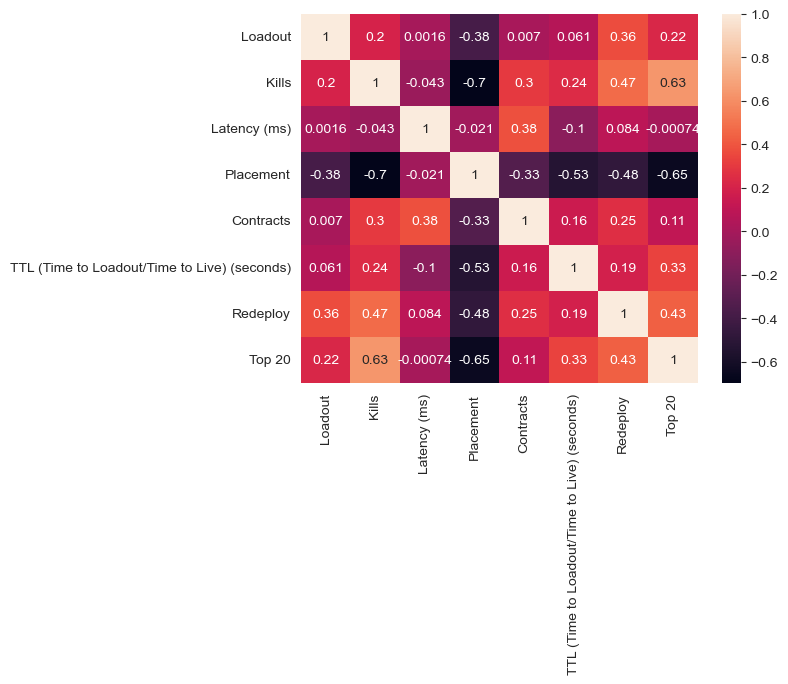

In [16]:
sns.heatmap(data.corr(), annot= True)

In [17]:
data = pd.get_dummies(data)

In [18]:
data.columns

Index(['Loadout', 'Kills', 'Latency (ms)', 'Placement', 'Contracts',
       'TTL (Time to Loadout/Time to Live) (seconds)', 'Redeploy', 'Top 20'],
      dtype='object')

In [19]:
y = data[["Loadout"]]
y1 = data[["Kills"]]
y2 = data[["Latency (ms)"]]
y3 = data[["Placement"]]
y4 = data[["Contracts"]]
y5 = data[["TTL (Time to Loadout/Time to Live) (seconds)"]]
y6 = data[["Redeploy"]]
y7 = data[["Top 20"]]

In [20]:
X = data.drop(["Loadout"], axis = 1)
X1 = data.drop(["Kills"], axis = 1)
X2 = data.drop(["Latency (ms)"], axis = 1)
X3 = data.drop(["Placement"], axis = 1)
X4 = data.drop(["Contracts"], axis = 1)
X5 = data.drop(["TTL (Time to Loadout/Time to Live) (seconds)"], axis = 1)
X6 = data.drop(["Redeploy"], axis = 1)
X7 = data.drop(["Top 20"], axis = 1)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
import random
train_size = random.uniform(0.6, 0.9)
X_train, X_test, y_train, y_test = train_test_split(
    X,y,
    train_size = train_size,
    random_state = 1
)
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2,y2,
    train_size = train_size,
    random_state = 1
)
X_train3, X_test3, y_train3, y_test3 = train_test_split(
    X3,y3,
    train_size = train_size,
    random_state = 1
)
X_train4, X_test4, y_train4, y_test4 = train_test_split(
    X4,y4,
    train_size = train_size,
    random_state = 1
)
X_train5, X_test5, y_train5, y_test5 = train_test_split(
    X5,y5,
    train_size = train_size,
    random_state = 1
)
X_train6, X_test6, y_train6, y_test6 = train_test_split(
    X6,y6,
    train_size = train_size,
    random_state = 1
)
X_train7, X_test7, y_train7, y_test7 = train_test_split(
    X7,y7,
    train_size = train_size,
    random_state = 1
)

In [23]:
from sklearn.ensemble import RandomForestRegressor

In [24]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_regressor = RandomForestRegressor(random_state=1)
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)
rf_best = grid_search.best_estimator_
train_score = rf_best.score(X_train, y_train)
test_score = rf_best.score(X_test, y_test)

print(f"Train score: {train_score:.3f}")
print(f"Test score: {test_score:.3f}")

c:\Users\Gajul\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Gajul\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Gajul\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Gajul\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best Score: -0.11208791273567498
Train score: 0.599
Test score: -0.130


c:\Users\Gajul\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [25]:
best_params = {
    'max_depth': None,
    'min_samples_leaf': 4,
    'min_samples_split': 10,
    'n_estimators': 500
}

In [26]:
lr = RandomForestRegressor(**best_params, random_state = 1)
lr2 = RandomForestRegressor(**best_params, random_state = 1)
lr3 = RandomForestRegressor(**best_params, random_state = 1)
lr4 = RandomForestRegressor(**best_params, random_state = 1)
lr5 = RandomForestRegressor(**best_params, random_state = 1)
lr6 = RandomForestRegressor(**best_params, random_state = 1)
lr7 = RandomForestRegressor(**best_params, random_state = 1)

In [27]:
lr.fit(X_train, y_train)
lr2.fit(X_train2, y_train2)
lr3.fit(X_train3, y_train3)
lr4.fit(X_train4, y_train4)
lr5.fit(X_train5, y_train5)
lr6.fit(X_train6, y_train6)
lr7.fit(X_train7, y_train7)

c:\Users\Gajul\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Gajul\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Gajul\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Gajul\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

RandomForestRegressor(min_samples_leaf=4, min_samples_split=10,
                      n_estimators=500, random_state=1)

In [28]:
print(lr.score(X_test, y_test).round(3))
print(lr2.score(X_test2, y_test2).round(3))
print(lr3.score(X_test3, y_test3).round(3))
print(lr4.score(X_test4, y_test4).round(3))
print(lr5.score(X_test5, y_test5).round(3))
print(lr6.score(X_test6, y_test6).round(3))
print(lr7.score(X_test7, y_test7).round(3))

0.037
-0.92
0.507
0.042
0.375
0.05
0.911


In [29]:
print(lr.score(X_train, y_train).round(3))
print(lr2.score(X_train2, y_train2).round(3))
print(lr3.score(X_train3, y_train3).round(3))
print(lr4.score(X_train4, y_train4).round(3))
print(lr5.score(X_train5, y_train5).round(3))
print(lr6.score(X_train6, y_train6).round(3))
print(lr7.score(X_train7, y_train7).round(3))

0.475
0.175
0.796
0.429
0.426
0.527
0.89


In [30]:
y_pred = lr.predict(X_test)
y_pred2 = lr2.predict(X_test2)
y_pred3 = lr3.predict(X_test3)
y_pred4 = lr4.predict(X_test4)
y_pred5 = lr5.predict(X_test5)
y_pred6 = lr6.predict(X_test6)
y_pred7 = lr7.predict(X_test7)

In [31]:
from sklearn.metrics import mean_squared_error

In [32]:
import math

In [33]:
print(math.sqrt(mean_squared_error(y_test, y_pred)))
print(math.sqrt(mean_squared_error(y_test2, y_pred2)))
print(math.sqrt(mean_squared_error(y_test3, y_pred3)))
print(math.sqrt(mean_squared_error(y_test4, y_pred4)))
print(math.sqrt(mean_squared_error(y_test5, y_pred5)))
print(math.sqrt(mean_squared_error(y_test6, y_pred6)))
print(math.sqrt(mean_squared_error(y_test7, y_pred7)))

1.3038823283807128
8.788553525889105
22.44323912056812
0.5216630336891604
160.58924091706163
0.5626183442388152
0.11105247691333424


In [34]:
data_new = X_train[:10]
data_new2 = X_train2[:10]
data_new3 = X_train3[:10]
data_new4 = X_train4[:10]
data_new5 = X_train5[:10]
data_new6 = X_train6[:10]
data_new7 = X_train7[:10]

In [35]:
print(lr.predict(data_new))
print(lr2.predict(data_new2))
print(lr3.predict(data_new3))
print(lr4.predict(data_new4))
print(lr5.predict(data_new5))
print(lr6.predict(data_new6))
print(lr7.predict(data_new7))

[2.6267271  1.19938819 2.58711259 2.09795397 0.72404818 1.43379187
 0.83993538 0.94930943 2.02376446 2.07552657]
[20.52420265 26.2197321  21.64978595 25.35486015 20.15389266 21.19617412
 24.79444829 19.29668029 26.45473046 30.99430625]
[53.10895153 34.55193243 61.76418721 19.56705263 74.02111851 48.93657006
 87.97709649 74.05261895 26.04227591 55.26907358]
[0.04646119 0.43211724 0.08248563 0.24843652 0.00430664 0.152016
 0.06700707 0.01869069 0.42771342 0.49508663]
[389.98225344 551.24371714 371.79056062 562.36303087 423.42716246
 521.2454624  326.85162883 403.53407223 528.88607425 450.66232943]
[0.94403381 0.83109388 0.48099146 1.51843269 0.06246028 0.96547407
 0.12976738 0.14253193 1.37680376 0.99570312]
[0.         0.4014228  0.         0.79453709 0.         0.00196667
 0.         0.         0.74857121 0.00128571]


In [36]:
print(y_train[:10])
print(y_train2[:10])
print(y_train3[:10])
print(y_train4[:10])
print(y_train5[:10])
print(y_train6[:10])
print(y_train7[:10])

    Loadout
31        3
24        0
10        2
57        3
19        0
33        1
61        0
17        0
56        2
54        2
    Latency (ms)
31            19
24            29
10            19
57            21
19            20
33            21
61            21
17            22
56            27
54            21
    Placement
31         59
24         22
10         57
57         10
19         69
33         51
61         89
17         65
56          7
54         42
    Contracts
31          0
24          0
10          0
57          0
19          0
33          0
61          0
17          0
56          0
54          1
    TTL (Time to Loadout/Time to Live) (seconds)
31                                           412
24                                           515
10                                           354
57                                           429
19                                           414
33                                           669
61                            

In [37]:
print(type(y_train))
print(type(y_train2))
print(type(y_train3))
print(type(y_train4))
print(type(y_train5))
print(type(y_train6))
print(type(y_train7))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [38]:
df_list = [y_train, y_train2, y_train3, y_train4, y_train5, y_train6, y_train7]
combined_prediction = pd.concat(df_list, axis=1)
combined_prediction.to_csv('futuregames.csv', index=False)